<a href="https://colab.research.google.com/github/hypro2/LLM-Multimodal-Colab/blob/main/gemma_bnb_4bit_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U transformers peft accelerate optimum
!pip install --quiet bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.1/407.1 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 6.1 MB/s eta 0:00:00


In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GenerationConfig
import torch

model_name_or_id =  "google/gemma-7b-it"

model = AutoModelForCausalLM.from_pretrained(model_name_or_id, torch_dtype=torch.float16, device_map="auto", load_in_4bit=True)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_id)

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.15k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/888 [00:00<?, ?B/s]

In [6]:

chat = [
    { "role": "user", "content": " 유희왕에서 가장 강력한 카드가 무엇인지 알고 있습니까?" },
]
prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

input_ids = tokenizer(prompt, return_tensors="pt").to(model.device)

outputs = model.generate(
    **input_ids,
    max_new_tokens=128,
    do_sample=True,
    top_p=0.95,
    temperature=0.7,
    repetition_penalty=1.1,
)

print(tokenizer.decode(outputs[0]))

<bos><start_of_turn>user
유희왕에서 가장 강력한 카드가 무엇인지 알고 있습니까?<end_of_turn>
<start_of_turn>model
)** 유희 왕의 제일강력은 바로 몬스터 공격형 메탈디버입니다.**

 Monster Attack Deck는 모든 요소에 걸쳐 최적화된 다양성을 가진 아사나장이를 사용합니다. 이 파악에는 다음과 같은 주요 특징들이 포함됩니다:


* **최대공속**:  해결할 수 있는 포커스와 방어 기술, 그리고 높게 평점 받아도 상대로 패배하는 대부분の 비용으로 간편하게 조작 가능함




-**세트업:** 집안이나


In [11]:

chat = [
    { "role": "user", "content": "Do you know what the most powerful card in Yu-Gi-Oh is?" },
]
prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

input_ids = tokenizer(prompt, return_tensors="pt").to(model.device)

outputs = model.generate(
    **input_ids,
    max_new_tokens=128,
    do_sample=True,
    top_p=0.95,
    temperature=0.7,
    repetition_penalty=1.1,
)

print(tokenizer.decode(outputs[0]))

<bos><start_of_turn>user
Do you know what the most powerful card in Yu-Gi-Oh is?<end_of_turn>
<start_of_turn>model
The answer to this question depends on which version of  Yu - Gi Oh! we are talking about.

Here's an overview: 


**In Standard Format:** (cards legal for competitive play) as per October, **Black Rose Dragon</strong> and its variants like Black Lullaby or Red Nova Dragun hold top spots due their high level with access to strong effects such quick destruction , negation & burn damage . The previous format king _Blue Eyes White Dragon_ still sees some use despite being banned since August thanks mainly through a highly potent archetype known "Sky Strix Sky Cavalry." Other notable cards include Link Summons monsters that offer


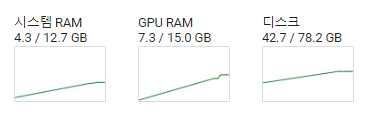